In [1]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/output'

In [ ]:
df = pd.read_csv(f'{path}/dataset_with_clusters.csv')

In [ ]:
df

,sector,pmc,ccmc,ap,bps,ac,ingpc_mean,cluster
0,Abel Gilbert,341.420856,0.000000e+00,3000.000000,1.866667,0.0,186.582404,0
1,Acacias,507.023203,0.000000e+00,245.000000,2.200000,1.0,297.917603,0
2,Alborada,819.085921,4.157044e-06,389.192825,2.066910,113.0,422.237240,3
3,Argelia,435.426671,4.232569e-07,1660.279070,2.155340,9.0,191.006255,0
4,Atarazana,857.244304,1.251978e-06,617.601790,2.236542,19.0,553.194133,0
...,...,...,...,...,...,...,...,...
56,Sauces,686.392528,9.823048e-07,295.268797,2.230769,10.0,364.891111,0
57,Solanda,517.208887,2.739629e-06,451.052632,2.456140,3.0,234.612433,0
58,Turubamba,542.188739,1.692989e-06,540.645161,2.450331,4.0,270.232101,0
59,Urdenor,936.585279,7.700748e-06,401.451220,2.317406,12.0,434.587815,3


In [ ]:
X = df.drop(columns=['sector', 'cluster'])
y = df['cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
y_train.value_counts()

0    43
3     3
2     2
Name: cluster, dtype: int64

In [ ]:
y_test.value_counts()

0    8
3    4
1    1
Name: cluster, dtype: int64

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
model = RandomForestClassifier(random_state=0)

In [ ]:
param_grid = {
    'n_estimators' : [50, 100, 150, 200, 250],
    'max_features' : ['auto','sqrt','log2'],
    'max_depth' : [10, 50, 100, 150, 200],
    'criterion' : ["gini", "entropy"]
}

In [ ]:
grid = GridSearchCV(model, param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100, 150, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 50}

In [ ]:
model = RandomForestClassifier(criterion = 'gini',
                              max_depth = 10,
                              max_features = 'auto',
                              n_estimators = 50,
                              random_state=0)

In [ ]:
results = cross_val_score(model, X_train, y_train, cv=5)
print(f'{results.mean()} +- {results.std()}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


0.9177777777777777 +- 0.0413357227505295


In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
model.score(X_test, y_test)

0.9230769230769231

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_predicted)

In [ ]:
model.feature_importances_

array([0.12008507, 0.4089983 , 0.21893037, 0.07694832, 0.06182954,
       0.11320839])

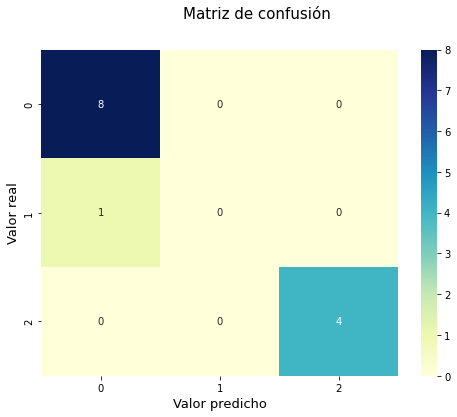

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.heatmap(matrix, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
_ = ax.set_ylabel('Valor real', fontsize=13)
_ = ax.set_xlabel('Valor predicho', fontsize=13)
_ = fig.suptitle('Matriz de confusión', fontsize=15)

In [4]:
feature_importance = pd.DataFrame({'importance': [0.12008507, 0.4089983 , 0.21893037, 0.07694832, 0.06182954, 0.11320839],
                                  'feature': ['pmc', 'ccmc', 'ap', 'bps', 'ac', 'ingpc_mean']})

In [9]:
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

In [12]:
sns.set_theme(style='darkgrid')

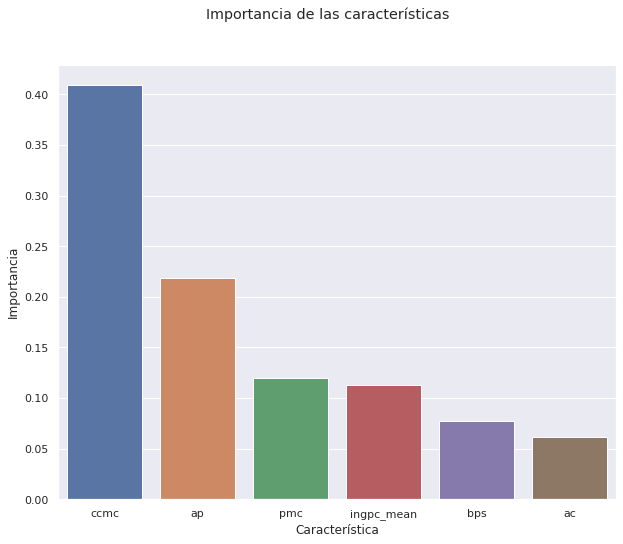

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
_ = sns.barplot(data=feature_importance, x='feature', y='importance', ax=ax)
_ = ax.set_xlabel('Característica')
_ = ax.set_ylabel('Importancia')
_ = fig.suptitle('Importancia de las características')